In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib
import re
from math import radians, sin, cos, sqrt, atan2

In [2]:
df = pd.read_csv("apartments_data_enriched_with_new_features.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'bfs_number', 'rooms', 'area', 'price', 'postalcode',
       'address', 'town', 'description_raw', 'bfs_name', 'pop', 'pop_dens',
       'frg_pct', 'emp', 'tax_income', 'lat', 'lon', 'x', 'y', 'room_per_m2',
       'price_per_m2', 'luxurious', 'temporary', 'furnished', 'area_cat',
       'area_cat_ecoded', '(ATTIKA)', '(SEESICHT)', '(POOL)', '(LUXURIÖS)',
       '(LOFT)', '(EXKLUSIV)', 'Kreis 6', 'Kreis 11', 'Kreis 12', 'Kreis 10',
       'Kreis 4', 'Kreis 1', 'Kreis 9', 'Kreis 5', 'Kreis 7', 'Kreis 3',
       'Kreis 2', 'Kreis 8', 'zurich_city'],
      dtype='object')

In [4]:
def haversine_distance(lat1, lon1, lat2=47.378177, lon2=8.540192):
    R = 6371  # km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

df['distance_to_hb'] = df.apply(lambda row: haversine_distance(row['lat'], row['lon']), axis=1)


In [5]:
df.columns

Index(['Unnamed: 0', 'bfs_number', 'rooms', 'area', 'price', 'postalcode',
       'address', 'town', 'description_raw', 'bfs_name', 'pop', 'pop_dens',
       'frg_pct', 'emp', 'tax_income', 'lat', 'lon', 'x', 'y', 'room_per_m2',
       'price_per_m2', 'luxurious', 'temporary', 'furnished', 'area_cat',
       'area_cat_ecoded', '(ATTIKA)', '(SEESICHT)', '(POOL)', '(LUXURIÖS)',
       '(LOFT)', '(EXKLUSIV)', 'Kreis 6', 'Kreis 11', 'Kreis 12', 'Kreis 10',
       'Kreis 4', 'Kreis 1', 'Kreis 9', 'Kreis 5', 'Kreis 7', 'Kreis 3',
       'Kreis 2', 'Kreis 8', 'zurich_city', 'distance_to_hb'],
      dtype='object')

In [6]:
df.head

<bound method NDFrame.head of      Unnamed: 0  bfs_number  rooms  area  price  postalcode  \
0             0         118    3.0    49   1441        8630   
1             1         118    3.0   111   2600        8630   
2             2         118    3.0    58   1490        8630   
3             3         118    4.0   118   3240        8630   
4             4         118    3.0    66   1450        8630   
..          ...         ...    ...   ...    ...         ...   
773         814           3    4.5   104   2055        8906   
774         815         196    4.5    98   1950        8617   
775         816           4    5.5   175   3720        8915   
776         817         173    4.5   130   2400        8335   
777         818         192    3.5   102   2272        8132   

                                    address              town  \
0             Neuhusstrasse 6, 8630 Rüti ZH           Rüti ZH   
1           Widacherstrasse 5, 8630 Rüti ZH           Rüti ZH   
2                 

In [7]:
df.head(1)

Unnamed: 0  bfs_number  rooms  area  price  postalcode  \
0           0         118    3.0    49   1441        8630   

                         address      town                 description_raw  \
0  Neuhusstrasse 6, 8630 Rüti ZH   Rüti ZH  «Gemütliche Wohnung im Grünen»   

    bfs_name  ...  Kreis 4  Kreis 1  Kreis 9  Kreis 5  Kreis 7  Kreis 3  \
0  Rüti (ZH)  ...        0        0        0        0        0        0   

   Kreis 2  Kreis 8  zurich_city  distance_to_hb  
0        0        0            0       26.964734  

[1 rows x 46 columns]

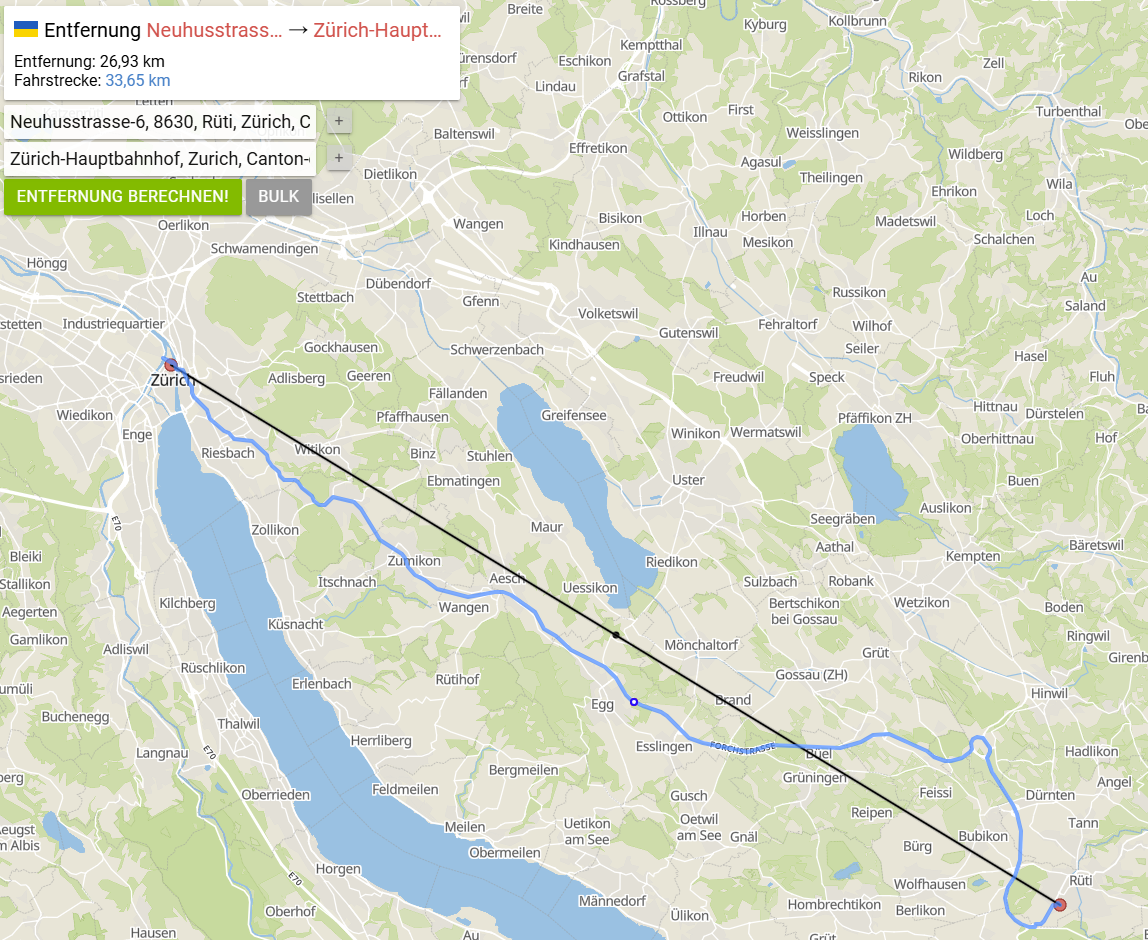

In [8]:
from IPython.display import Image, display


image_path = 'distance.png'

display(Image(filename=image_path))

In [9]:
features = ['rooms', 'area', 'pop', 'pop_dens', 'frg_pct', 'emp', 'tax_income', 'room_per_m2',
            'luxurious', 'temporary', 'furnished', 'area_cat_ecoded', '(LUXURI\u00d6S)', '(POOL)',
            '(SEESICHT)', '(EXKLUSIV)', '(ATTIKA)', '(LOFT)', 'Kreis 6', 'Kreis 11', 'Kreis 12',
            'Kreis 10', 'Kreis 4', 'Kreis 1', 'Kreis 9', 'Kreis 5', 'Kreis 7', 'Kreis 3', 'Kreis 2',
            'Kreis 8', 'distance_to_hb']

target = 'price'

In [10]:
X = df[features]
y = df[target]

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE: {-np.mean(cv_scores):.2f} CHF")

Cross-validation MAE: 406.45 CHF


In [13]:
def model_performance(features, df, random_forest_model = RandomForestRegressor(random_state=42)):
    df = df.sample(frac=1, random_state=42)
    X, y = df[features], df['price']
    scores = cross_val_score(random_forest_model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    print('CV results RMSE:', np.round(scores))
    print('Mean RMSE:', np.mean(np.round(scores, 0)))

In [14]:
features = ['rooms', 'area', 'pop', 'pop_dens', 'frg_pct', 'emp', 'tax_income', 'room_per_m2', 'luxurious', 'temporary', 'furnished', 'area_cat_ecoded',
       '(LUXURIÖS)', '(POOL)', '(SEESICHT)',
       '(EXKLUSIV)', '(ATTIKA)', '(LOFT)', 'Kreis 6', 'Kreis 11', 'Kreis 12', 'Kreis 10',
       'Kreis 4', 'Kreis 1', 'Kreis 9', 'Kreis 5', 'Kreis 7', 'Kreis 3',
       'Kreis 2', 'Kreis 8']
model_performance(features, df)

CV results RMSE: [-641. -521. -662. -498. -556.]
Mean RMSE: -575.6


In [15]:
features = ['rooms', 'area', 'pop', 'pop_dens', 'frg_pct', 'emp', 'tax_income', 'room_per_m2', 'luxurious', 'temporary', 'furnished', 'area_cat_ecoded',
       '(LUXURIÖS)', '(POOL)', '(SEESICHT)',
       '(EXKLUSIV)', '(ATTIKA)', '(LOFT)', 'Kreis 6', 'Kreis 11', 'Kreis 12', 'Kreis 10',
       'Kreis 4', 'Kreis 1', 'Kreis 9', 'Kreis 5', 'Kreis 7', 'Kreis 3',
       'Kreis 2', 'Kreis 8', 'distance_to_hb']
model_performance(features, df)

CV results RMSE: [-567. -496. -597. -501. -517.]
Mean RMSE: -535.6


In [16]:
model.fit(X, y)

predicted_y = model.predict(X)


In [17]:
import gradio as gr
def predict_price(rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                  luxurious, temporary, furnished, area_cat_ecoded, lux, pool, seesicht,
                  exklusiv, attika, loft, k6, k11, k12, k10, k4, k1, k9, k5, k7, k3, k2, k8,
                  lat, lon):
    distance = haversine_distance(lat, lon)
    input_data = pd.DataFrame([[rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                                 luxurious, temporary, furnished, area_cat_ecoded, lux, pool,
                                 seesicht, exklusiv, attika, loft, k6, k11, k12, k10, k4, k1,
                                 k9, k5, k7, k3, k2, k8, distance]],
                               columns=features)
    pred = model.predict(input_data)[0]
    return f"Estimated Rent Price: CHF {pred:.2f}"

inputs = [
    gr.Number(label="Rooms"),
    gr.Number(label="Area (m²)"),
    gr.Number(label="Population"),
    gr.Number(label="Population Density"),
    gr.Number(label="Foreigners (%)"),
    gr.Number(label="Employment"),
    gr.Number(label="Taxable Income"),
    gr.Number(label="Room per m²"),
    gr.Checkbox(label="Luxurious"),
    gr.Checkbox(label="Temporary"),
    gr.Checkbox(label="Furnished"),
    gr.Number(label="Area Category Encoded"),
    gr.Checkbox(label="(LUXURIÖS)"),
    gr.Checkbox(label="(POOL)"),
    gr.Checkbox(label="(SEESICHT)"),
    gr.Checkbox(label="(EXKLUSIV)"),
    gr.Checkbox(label="(ATTIKA)"),
    gr.Checkbox(label="(LOFT)"),
    gr.Checkbox(label="Kreis 6"),
    gr.Checkbox(label="Kreis 11"),
    gr.Checkbox(label="Kreis 12"),
    gr.Checkbox(label="Kreis 10"),
    gr.Checkbox(label="Kreis 4"),
    gr.Checkbox(label="Kreis 1"),
    gr.Checkbox(label="Kreis 9"),
    gr.Checkbox(label="Kreis 5"),
    gr.Checkbox(label="Kreis 7"),
    gr.Checkbox(label="Kreis 3"),
    gr.Checkbox(label="Kreis 2"),
    gr.Checkbox(label="Kreis 8"),
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude")
]

examples = [
    [3, 75, 100000, 1200, 30, 150000, 25000, 1.2, True, False, True, 1, True, False, True, False, True, False, False, False, False, True, False, False, False, True, False, 47.378177, 8.540192],
    [2, 50, 80000, 1000, 25, 120000, 20000, 1.5, False, True, True, 2, False, True, False, True, True, True, False, True, False, False, True, False, False, True, True, 47.378177, 8.540192],
    [4, 95, 150000, 2000, 35, 180000, 35000, 2.0, True, False, False, 3, True, False, True, False, False, True, True, False, False, True, True, True, False, False, True, 47.378177, 8.540192]
]


demo = gr.Interface(fn=predict_price, inputs=inputs, outputs="text",
                    title="Zürich Apartment Rent Estimator",
                    description="Enter apartment characteristics to estimate the rent price.",
                    examples=examples)

demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [38]:
import gradio as gr

def predict_price(rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                  luxurious, temporary, furnished, area_cat_ecoded, lux, pool, seesicht,
                  exklusiv, attika, loft, k6, k11, k12, k10, k4, k1, k9, k5, k7, k3, k2, k8,
                  lat, lon):
    distance = haversine_distance(lat, lon)
    input_data = pd.DataFrame([[rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                                 luxurious, temporary, furnished, area_cat_ecoded, lux, pool,
                                 seesicht, exklusiv, attika, loft, k6, k11, k12, k10, k4, k1,
                                 k9, k5, k7, k3, k2, k8, distance]],
                               columns=features)
    pred = model.predict(input_data)[0]
    return f"Estimated Rent Price: CHF {pred:.2f}"

inputs = [
    gr.Number(label="Rooms"),
    gr.Number(label="Area (m²)"),
    gr.Number(label="Population"),
    gr.Number(label="Population Density"),
    gr.Number(label="Foreigners (%)"),
    gr.Number(label="Employment"),
    gr.Number(label="Taxable Income"),
    gr.Number(label="Room per m²"),
    gr.Checkbox(label="Luxurious"),
    gr.Checkbox(label="Temporary"),
    gr.Checkbox(label="Furnished"),
    gr.Number(label="Area Category Encoded"),
    gr.Checkbox(label="(LUXURIÖS)"),
    gr.Checkbox(label="(POOL)"),
    gr.Checkbox(label="(SEESICHT)"),
    gr.Checkbox(label="(EXKLUSIV)"),
    gr.Checkbox(label="(ATTIKA)"),
    gr.Checkbox(label="(LOFT)"),
    gr.Checkbox(label="Kreis 6"),
    gr.Checkbox(label="Kreis 11"),
    gr.Checkbox(label="Kreis 12"),
    gr.Checkbox(label="Kreis 10"),
    gr.Checkbox(label="Kreis 4"),
    gr.Checkbox(label="Kreis 1"),
    gr.Checkbox(label="Kreis 9"),
    gr.Checkbox(label="Kreis 5"),
    gr.Checkbox(label="Kreis 7"),
    gr.Checkbox(label="Kreis 3"),
    gr.Checkbox(label="Kreis 2"),
    gr.Checkbox(label="Kreis 8"),
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude")
]

# ⚠️ Make sure each list has 32 entries and only one Kreis = True
examples = [
    # Kreis 6
    [3, 75, 100000, 1200, 30, 150000, 25000, 1.2, True, False, True, 1, True, False, True, False, True, False,
     True, False, False, False, False, False, False, False, False, False, False, False,
     47.378177, 8.540192],
    
    # Kreis 4
    [2, 55, 90000, 1500, 40, 140000, 22000, 1.3, False, True, True, 2, False, True, False, True, True, False,
     False, False, False, False, True, False, False, False, False, False, False, False,
     47.370000, 8.526000],
    
    # Kreis 1
    [4, 100, 130000, 1900, 28, 160000, 27000, 1.5, True, False, False, 3, True,


SyntaxError: incomplete input (216966867.py, line 64)

In [40]:
import gradio as gr
def predict_price(rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                  luxurious, temporary, furnished, area_cat_ecoded, lux, pool, seesicht,
                  exklusiv, attika, loft, k6, k11, k12, k10, k4, k1, k9, k5, k7, k3, k2, k8,
                  lat, lon):
    distance = haversine_distance(lat, lon)
    input_data = pd.DataFrame([[rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                                 luxurious, temporary, furnished, area_cat_ecoded, lux, pool,
                                 seesicht, exklusiv, attika, loft, k6, k11, k12, k10, k4, k1,
                                 k9, k5, k7, k3, k2, k8, distance]],
                               columns=features)
    pred = model.predict(input_data)[0]
    return f"Estimated Rent Price: CHF {pred:.2f}"

inputs = [
    gr.Number(label="Rooms"),
    gr.Number(label="Area (m²)"),
    gr.Number(label="Population"),
    gr.Number(label="Population Density"),
    gr.Number(label="Foreigners (%)"),
    gr.Number(label="Employment"),
    gr.Number(label="Taxable Income"),
    gr.Number(label="Room per m²"),
    gr.Checkbox(label="Luxurious"),
    gr.Checkbox(label="Temporary"),
    gr.Checkbox(label="Furnished"),
    gr.Number(label="Area Category Encoded"),
    gr.Checkbox(label="(LUXURIÖS)"),
    gr.Checkbox(label="(POOL)"),
    gr.Checkbox(label="(SEESICHT)"),
    gr.Checkbox(label="(EXKLUSIV)"),
    gr.Checkbox(label="(ATTIKA)"),
    gr.Checkbox(label="(LOFT)"),
    gr.Checkbox(label="Kreis 6"),
    gr.Checkbox(label="Kreis 11"),
    gr.Checkbox(label="Kreis 12"),
    gr.Checkbox(label="Kreis 10"),
    gr.Checkbox(label="Kreis 4"),
    gr.Checkbox(label="Kreis 1"),
    gr.Checkbox(label="Kreis 9"),
    gr.Checkbox(label="Kreis 5"),
    gr.Checkbox(label="Kreis 7"),
    gr.Checkbox(label="Kreis 3"),
    gr.Checkbox(label="Kreis 2"),
    gr.Checkbox(label="Kreis 8"),
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude")
]

examples = [
    [3, 75, 100000, 1200, 30, 150000, 25000, 1.2, True, False, True, 1, True, False, True, False, True, False, False, False, False, True, False, False, False, True, False, 47.378177, 8.540192],
    [2, 50, 80000, 1000, 25, 120000, 20000, 1.5, False, True, True, 2, False, True, False, True, True, True, False, True, False, False, True, False, False, True, True, 47.378177, 8.540192],
    [4, 95, 150000, 2000, 35, 180000, 35000, 2.0, True, False, False, 3, True, False, True, False, False, True, True, False, False, True, True, True, False, False, True, 47.378177, 8.540192]
]


demo = gr.Interface(fn=predict_price, inputs=inputs, outputs="text",
                    title="Zürich Apartment Rent Estimator",
                    description="Enter apartment characteristics to estimate the rent price.",
                    examples=examples)

demo.launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [42]:
import gradio as gr

def predict_price(rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                  luxurious, temporary, furnished, area_cat_ecoded, lux, pool, seesicht,
                  exklusiv, attika, loft, k6, k11, k12, k10, k4, k1, k9, k5, k7, k3, k2, k8,
                  lat, lon):
    distance = haversine_distance(lat, lon)
    input_data = pd.DataFrame([[rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                                 luxurious, temporary, furnished, area_cat_ecoded, lux, pool,
                                 seesicht, exklusiv, attika, loft, k6, k11, k12, k10, k4, k1,
                                 k9, k5, k7, k3, k2, k8, distance]],
                               columns=features)
    pred = model.predict(input_data)[0]
    return f"Estimated Rent Price: CHF {pred:.2f}"

inputs = [
    gr.Number(label="Rooms"),
    gr.Number(label="Area (m²)"),
    gr.Number(label="Population"),
    gr.Number(label="Population Density"),
    gr.Number(label="Foreigners (%)"),
    gr.Number(label="Employment"),
    gr.Number(label="Taxable Income"),
    gr.Number(label="Room per m²"),
    gr.Checkbox(label="Luxurious"),
    gr.Checkbox(label="Temporary"),
    gr.Checkbox(label="Furnished"),
    gr.Number(label="Area Category Encoded"),
    gr.Checkbox(label="(LUXURIÖS)"),
    gr.Checkbox(label="(POOL)"),
    gr.Checkbox(label="(SEESICHT)"),
    gr.Checkbox(label="(EXKLUSIV)"),
    gr.Checkbox(label="(ATTIKA)"),
    gr.Checkbox(label="(LOFT)"),
    gr.Checkbox(label="Kreis 6"),
    gr.Checkbox(label="Kreis 11"),
    gr.Checkbox(label="Kreis 12"),
    gr.Checkbox(label="Kreis 10"),
    gr.Checkbox(label="Kreis 4"),
    gr.Checkbox(label="Kreis 1"),
    gr.Checkbox(label="Kreis 9"),
    gr.Checkbox(label="Kreis 5"),
    gr.Checkbox(label="Kreis 7"),
    gr.Checkbox(label="Kreis 3"),
    gr.Checkbox(label="Kreis 2"),
    gr.Checkbox(label="Kreis 8"),
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude")
]

# ⚠️ Make sure each list has 32 entries and only one Kreis = True
examples = [
    # Kreis 6
    [3, 75, 100000, 1200, 30, 150000, 25000, 1.2, True, False, True, 1, True, False, True, False, True, False,
     True, False, False, False, False, False, False, False, False, False, False, False,
     47.378177, 8.540192],
    
    # Kreis 4
    [2, 55, 90000, 1500, 40, 140000, 22000, 1.3, False, True, True, 2, False, True, False, True, True, False,
     False, False, False, False, True, False, False, False, False, False, False, False,
     47.370000, 8.526000],
    
    # Kreis 1
    [4, 100, 130000, 1900, 28, 160000, 27000, 1.5, True, False, False, 3, True, False, True, True, False, True,
     False, False, False, False, False, True, False, False, False, False, False, False,
     47.368650, 8.541694]
]

demo = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs="text",
    title="Zürich Apartment Rent Estimator",
    description="Enter apartment characteristics to estimate the rent price.",
    examples=examples
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [44]:
import gradio as gr

def predict_price(rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                  luxurious, temporary, furnished, area_cat_ecoded, lux, pool, seesicht,
                  exklusiv, attika, loft, k6, k11, k12, k10, k4, k1, k9, k5, k7, k3, k2, k8,
                  lat, lon):
    distance = haversine_distance(lat, lon)
    input_data = pd.DataFrame([[rooms, area, pop, pop_dens, frg_pct, emp, tax_income, room_per_m2,
                                 luxurious, temporary, furnished, area_cat_ecoded, lux, pool,
                                 seesicht, exklusiv, attika, loft, k6, k11, k12, k10, k4, k1,
                                 k9, k5, k7, k3, k2, k8, distance]],
                               columns=features)
    pred = model.predict(input_data)[0]
    return f"Estimated Rent Price: CHF {pred:.2f}"

inputs = [
    gr.Number(label="Rooms"),
    gr.Number(label="Area (m²)"),
    gr.Number(label="Population"),
    gr.Number(label="Population Density"),
    gr.Number(label="Foreigners (%)"),
    gr.Number(label="Employment"),
    gr.Number(label="Taxable Income"),
    gr.Number(label="Room per m²"),
    gr.Checkbox(label="Luxurious"),
    gr.Checkbox(label="Temporary"),
    gr.Checkbox(label="Furnished"),
    gr.Number(label="Area Category Encoded"),
    gr.Checkbox(label="(LUXURIÖS)"),
    gr.Checkbox(label="(POOL)"),
    gr.Checkbox(label="(SEESICHT)"),
    gr.Checkbox(label="(EXKLUSIV)"),
    gr.Checkbox(label="(ATTIKA)"),
    gr.Checkbox(label="(LOFT)"),
    gr.Checkbox(label="Kreis 6"),
    gr.Checkbox(label="Kreis 11"),
    gr.Checkbox(label="Kreis 12"),
    gr.Checkbox(label="Kreis 10"),
    gr.Checkbox(label="Kreis 4"),
    gr.Checkbox(label="Kreis 1"),
    gr.Checkbox(label="Kreis 9"),
    gr.Checkbox(label="Kreis 5"),
    gr.Checkbox(label="Kreis 7"),
    gr.Checkbox(label="Kreis 3"),
    gr.Checkbox(label="Kreis 2"),
    gr.Checkbox(label="Kreis 8"),
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude")
]


examples = [
    # Kreis 6 — near ETH Zürich
    [3, 75, 100000, 1200, 30, 150000, 25000, 1.2, True, False, True, 1, True, False, True, False, True, False,
     True, False, False, False, False, False, False, False, False, False, False, False,
     47.3830, 8.5470],
    
    # Kreis 4 — Langstrasse area
    [2, 55, 90000, 1500, 40, 140000, 22000, 1.3, False, True, True, 2, False, True, False, True, True, False,
     False, False, False, False, True, False, False, False, False, False, False, False,
     47.3750, 8.5275],
    
    # Kreis 1 — Zürich Old Town
    [4, 100, 130000, 1900, 28, 160000, 27000, 1.5, True, False, False, 3, True, True, True, False, False, True,
     False, False, False, False, False, True, False, False, False, False, False, False,
     47.3660, 8.5445],
    
    # No Kreis selected — Outside city center
    [2, 60, 85000, 1100, 35, 135000, 21000, 1.1, False, False, True, 0, False, False, False, False, False, False,
     False, False, False, False, False, False, False, False, False, False, False, False,
     47.4100, 8.4900]
]

demo = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs="text",
    title="Zürich Apartment Rent Estimator",
    description="Enter apartment characteristics to estimate the rent price.",
    examples=examples
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [46]:
import pickle

# save model to file
model_filename = "raoul_aufgabe_mit_distance_to_hb.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(model, file=f)